In [17]:
import pandas as pd
import numpy as np

experiments = dict(
    standard='standard',
)
seeds = [f's{i}' for i in range(1, 11)]
stats = {}
fits = []

exp_group = 'v0_1_3'

base_dir = f'../../datalake/{exp_group}'

for experiment, proportion in experiments.items():
    stats_data = f'{base_dir}/{experiment}/data/xbipedal/runstats'
    stats[experiment] = {}
    for seed in seeds:
        seed_stats = pd.read_csv(f'{stats_data}/{seed}_run.csv')
        fits.append(dict(
            seed=seed,
            experiment=proportion,
            bestgfit=seed_stats.bestgfit.max()
        ))
        stats[experiment][seed] = seed_stats

Text(0.5, 0, '')

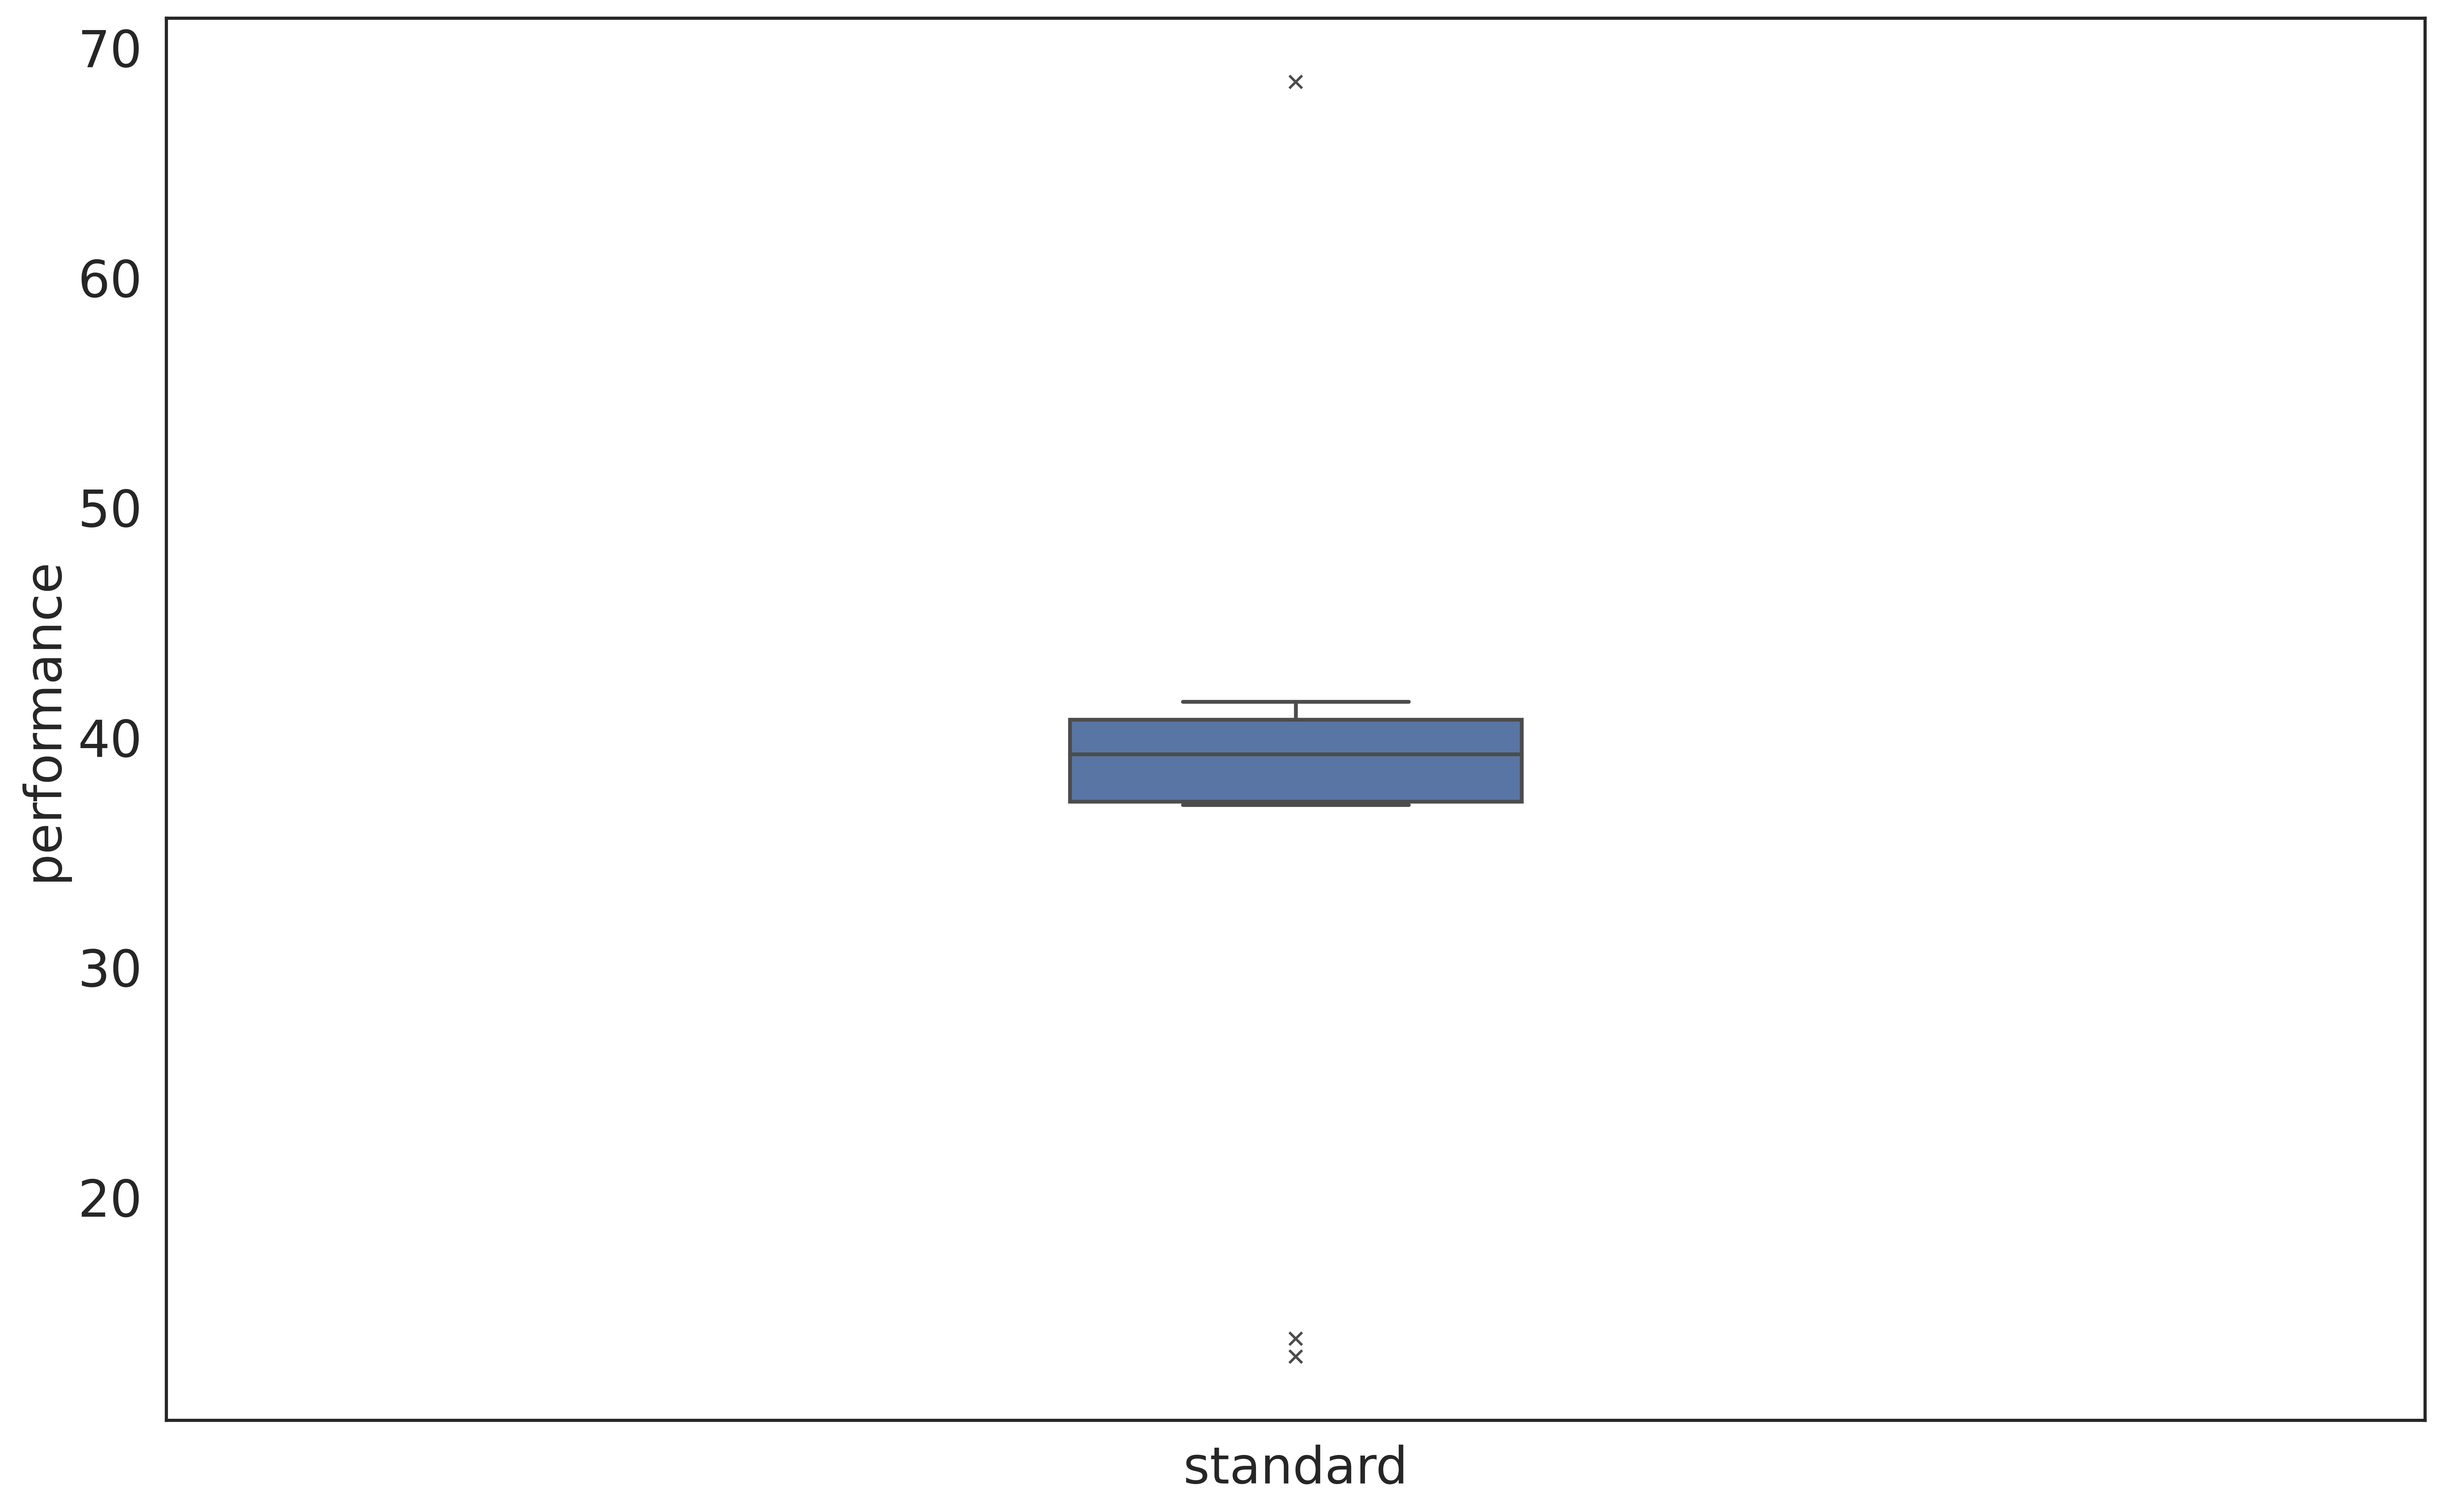

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(16,10)}, style='white')

df = pd.DataFrame(fits)
plt.figure(dpi=600)
sns.boxplot(df, x='experiment', y='bestgfit', width=0.2, flierprops={"marker": "x"})
plt.ylabel("performance", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("")

/tmp/ipykernel_507158/3201648596.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seed'] = seed
/tmp/ipykernel_507158/3201648596.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seed'] = seed
/tmp/ipykernel_507158/3201648596.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

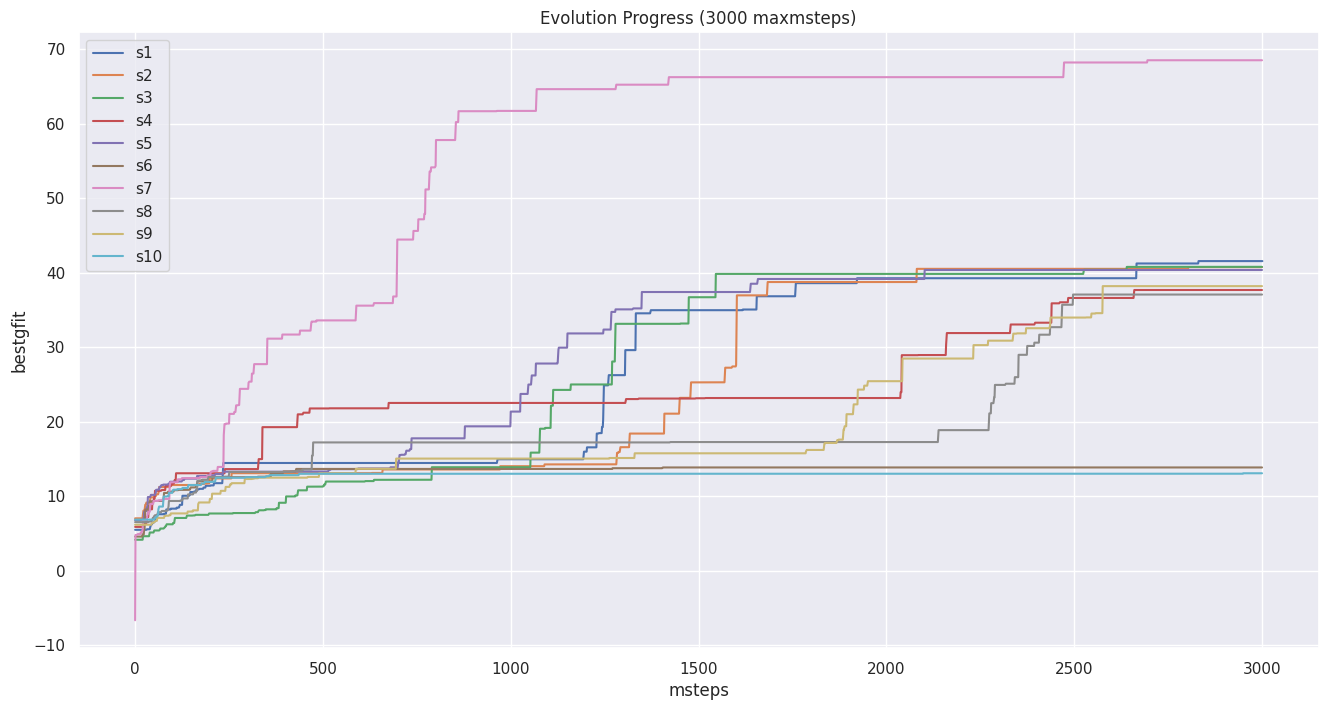

In [19]:
mean_stats = pd.DataFrame()

maxmsteps = 3000
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(rc={'figure.figsize':(16,8)})

performance_data = pd.DataFrame()
for seed, data in stats.get("standard").items():
    df = data[['msteps', 'bestgfit']]
    df['seed'] = seed
    performance_data = pd.concat([performance_data, df])

sns.lineplot(data=performance_data, x='msteps', y='bestgfit', hue='seed')
plt.legend(loc='upper left')
plt.title(f"Evolution Progress ({maxmsteps} maxmsteps)")
plt.xlabel("msteps")
plt.ylabel("bestgfit")
plt.show()